In [5]:
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")
# print(train.head())
# print(test.head())

In [6]:
train.info()
train.isnull().sum().sort_values(ascending=False)
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 9.8 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.1 MB 11.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.9 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.3 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 9.1 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------ --------------------------- 2.1/7.0 MB 10.7 MB/s eta 0:00:01
   ---------------------- ----------------- 3.9/7.0 MB 9.8 MB/s eta 0:00:01
   ------------------------------------ --- 6.3/7.0 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 9.6 MB/s  0:00:00

   ----- ----------------------------

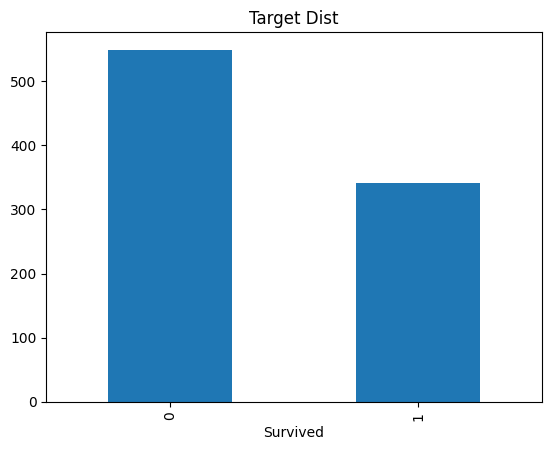

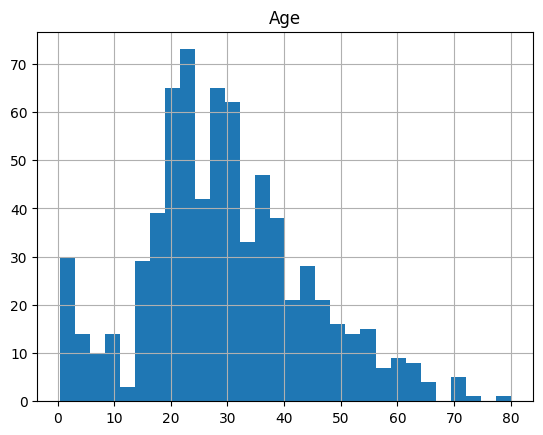

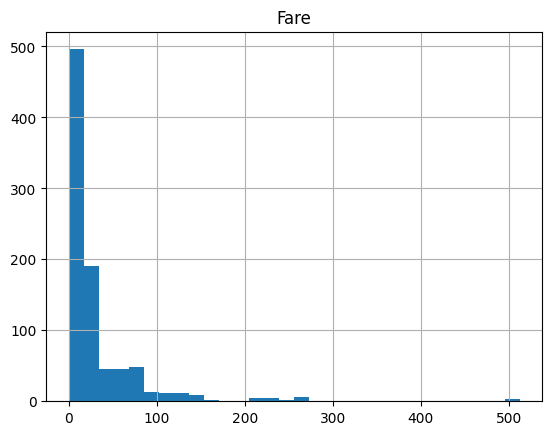

In [9]:
import matplotlib.pyplot as plt

train["Survived"].value_counts().plot(kind="bar"); plt.title("Target Dist"); plt.show()
train["Age"].hist(bins=30); plt.title("Age"); plt.show()
train["Fare"].hist(bins=30); plt.title("Fare"); plt.show()

In [11]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.9 MB 10.1 MB/s eta 0:00:01
   ----------------- ---------------------- 3.9/8.9 MB 10.2 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.9 MB 10.2 MB/s eta 0:00:01
   ------------------------------------ --- 8.1/8.9 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 9.9 MB/s  0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   -- ------------------------------------- 2.4/38.6 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.6 MB 11.2 MB/s eta 0:00:04
   ------ --------------------------------- 6.3/38.6 MB 10.2 MB/s eta 0:00:04
   -------- ------------------------------- 8.7/38.6 MB 10.5 MB/s eta 0:00:03
   ----------- ---------------------------- 10.7/38.6 MB 10.7 MB/s eta 0:00:03
   ------------ --------------------------- 12.1/38.6 MB 10.1 MB/s eta 0:00:03
   -------

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = train.copy()
df["Sex"] = df["Sex"].map({"male":0, "female":1})
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Embarked"] = df["Embarked"].map({"S":0, "C":1, "Q":2})
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)

features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
X = df[features]; y = df["Survived"]
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=2025, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print("Val acc:", accuracy_score(y_val, pred))


Val acc: 0.7988826815642458


C:\Users\김성현\AppData\Local\Temp\ipykernel_3168\398654188.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
C:\Users\김성현\AppData\Local\Temp\ipykernel_3168\398654188.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [21]:
tt = test.copy()
tt["Sex"] = tt["Sex"].map({"male":0, "female":1})
tt["Embarked"] = tt["Embarked"].map({"S":0, "C":1, "Q":2})
tt["Age"].fillna(df["Age"].median(), inplace=True)
tt["Fare"].fillna(df["Fare"].median(), inplace=True)

submission = gender_submission.copy()
submission["Survived"] = model.predict(tt[features]).astype(int)
submission.to_csv("C:/Users/김성현/OneDrive/바탕 화면/ssafy_data_prep/projects/titanic/submission.csv", index=False)
print("Saved:", "C:/Users/김성현/OneDrive/바탕 화면/ssafy_data_prep/projects/titanic/submission.csv")


Saved: C:/Users/김성현/OneDrive/바탕 화면/ssafy_data_prep/projects/titanic/submission.csv


C:\Users\김성현\AppData\Local\Temp\ipykernel_3168\1404242793.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tt["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\김성현\AppData\Local\Temp\ipykernel_3168\1404242793.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example